# Data Preparation Notebook

In [1]:
import random
random.seed(123)

import pandas as pd
import datasets
from sklearn.model_selection import train_test_split

## Loading the dataset 

In [2]:
df = pd.read_csv('data/complaints.csv')
print(df.shape)
df.head()

/tmp/ipykernel_707002/3991508967.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/complaints.csv')


(5444636, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",UT,84124,NaN,Consent not provided,Web,2024-02-28,Closed with non-monetary relief,Yes,NaN,8440780
1,2024-06-08,Mortgage,Home equity loan or line of credit (HELOC),Trouble during payment process,Payment process,NaN,Company has responded to the consumer and the ...,PENTAGON FEDERAL CREDIT UNION,AZ,85254,NaN,NaN,Web,2024-06-08,Closed with explanation,Yes,NaN,9208874
2,2024-06-03,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,Company has responded to the consumer and the ...,PENTAGON FEDERAL CREDIT UNION,NJ,08723,NaN,NaN,Phone,2024-06-03,Closed with explanation,Yes,NaN,9160068
3,2024-05-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,LEXISNEXIS,DE,19808,NaN,NaN,Web,2024-05-31,Closed with explanation,Yes,NaN,9144264
4,2024-05-31,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,NaN,NaN,NaN,"ID Analytics, Inc.",AL,352XX,NaN,Other,Web,2024-05-31,Closed with explanation,Yes,NaN,9145470


- We will just be using Product, Issue and Consumer complaint narrative

In [3]:
df = df[['Product', 'Issue', 'Consumer complaint narrative']]
df.head()

,Product,Issue,Consumer complaint narrative
0,Credit reporting or other personal consumer re...,Improper use of your report,NaN
1,Mortgage,Trouble during payment process,NaN
2,Checking or savings account,Managing an account,NaN
3,Credit reporting or other personal consumer re...,Incorrect information on your report,NaN
4,Credit reporting or other personal consumer re...,Problem with fraud alerts or security freezes,NaN


In [4]:
df.isnull().sum()

Product                               0
Issue                                 6
Consumer complaint narrative    3543607
dtype: int64

- We will drop all the rows with no consumer complaint

In [5]:
df.dropna(subset=['Issue', 'Consumer complaint narrative'], inplace=True)
df.shape

(1901029, 3)

- Just taking 

In [6]:
df['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Debt collection',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Credit card', 'Debt or credit management',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Vehicle loan or lease',
       'Prepaid card', 'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Credit card or prepaid card', 'Consumer Loan',
       'Payday loan, title loan, or personal loan', 'Credit reporting',
       'Payday loan', 'Bank account or service', 'Money transfers',
       'Other financial service', 'Virtual currency'], dtype=object)

In [7]:
product_categories_to_use = [
    'Vehicle loan or lease', 'Student loan', 'Consumer Loan'
]

In [8]:
issue_categories_to_use = [
    'Managing the loan or lease', 'Problems at the end of the loan or lease', 'Struggling to pay your loan', 'Getting a loan or lease',

    'Dealing with your lender or servicer', 'Incorrect information on your report', 'Struggling to repay your loan', 

    'Problems when you are unable to pay', 'Taking out the loan or lease'
]

In [9]:
df = df[(df.Product.isin(product_categories_to_use)) & (df.Issue.isin(issue_categories_to_use))]
df.shape

(66805, 3)

In [10]:
df.loc[df.Issue == 'Struggling to repay your loan', 'Issue'] = 'Struggling to pay your loan'

In [11]:
temp_df = df.sample(10000)
temp_df.head()

,Product,Issue,Consumer complaint narrative
4709769,Vehicle loan or lease,Getting a loan or lease,Bank of America approved my auto loan based on...
2672943,Student loan,Dealing with your lender or servicer,"When I was in medical school, according to the..."
3906756,Vehicle loan or lease,Struggling to pay your loan,I am experiencing a Hardship financially due t...
1507463,Student loan,Dealing with your lender or servicer,Nelnet purchased my loan from Great Lakes. Whe...
3217121,Consumer Loan,Managing the loan or lease,On XX/XX/XXXX ( approximate ) I called Ally to...


In [12]:
temp_df.Product.value_counts()

Student loan             4566
Vehicle loan or lease    4168
Consumer Loan            1266
Name: Product, dtype: int64

In [13]:
temp_df.Issue.value_counts()

Dealing with your lender or servicer        3434
Managing the loan or lease                  2211
Struggling to pay your loan                 1703
Problems at the end of the loan or lease     900
Getting a loan or lease                      630
Incorrect information on your report         523
Problems when you are unable to pay          357
Taking out the loan or lease                 242
Name: Issue, dtype: int64

In [14]:
# renaming the columns for further processing

temp_df.rename(
    columns={
        'Product': 'product', "Issue": 'issue', 'Consumer complaint narrative': 'consumer_complaint'
    }, inplace=True
)
temp_df.head()

,product,issue,consumer_complaint
4709769,Vehicle loan or lease,Getting a loan or lease,Bank of America approved my auto loan based on...
2672943,Student loan,Dealing with your lender or servicer,"When I was in medical school, according to the..."
3906756,Vehicle loan or lease,Struggling to pay your loan,I am experiencing a Hardship financially due t...
1507463,Student loan,Dealing with your lender or servicer,Nelnet purchased my loan from Great Lakes. Whe...
3217121,Consumer Loan,Managing the loan or lease,On XX/XX/XXXX ( approximate ) I called Ally to...


## Creating Train, Test and Dev Splits

In [15]:
train, test = train_test_split(temp_df, test_size=0.2, stratify=temp_df.issue)
train, val = train_test_split(train, test_size=0.15, stratify=train.issue)

train.shape, test.shape, val.shape

((6800, 3), (2000, 3), (1200, 3))

In [16]:
train.issue.value_counts()

Dealing with your lender or servicer        2335
Managing the loan or lease                  1504
Struggling to pay your loan                 1158
Problems at the end of the loan or lease     612
Getting a loan or lease                      428
Incorrect information on your report         355
Problems when you are unable to pay          243
Taking out the loan or lease                 165
Name: issue, dtype: int64

In [17]:
val.issue.value_counts()

Dealing with your lender or servicer        412
Managing the loan or lease                  265
Struggling to pay your loan                 204
Problems at the end of the loan or lease    108
Getting a loan or lease                      76
Incorrect information on your report         63
Problems when you are unable to pay          43
Taking out the loan or lease                 29
Name: issue, dtype: int64

In [18]:
test.issue.value_counts()

Dealing with your lender or servicer        687
Managing the loan or lease                  442
Struggling to pay your loan                 341
Problems at the end of the loan or lease    180
Getting a loan or lease                     126
Incorrect information on your report        105
Problems when you are unable to pay          71
Taking out the loan or lease                 48
Name: issue, dtype: int64

In [19]:
train.to_csv('data/train.csv', index=False)
val.to_csv('data/val.csv', index=False)
test.to_csv('data/test.csv', index=False)

## Creating Datasets object

In [20]:
data = datasets.DatasetDict(
    {
        'train': datasets.Dataset.from_pandas(train),
        'val': datasets.Dataset.from_pandas(val),
        'test': datasets.Dataset.from_pandas(test)
    }
)
data

DatasetDict({
    train: Dataset({
        features: ['product', 'issue', 'consumer_complaint', '__index_level_0__'],
        num_rows: 6800
    })
    val: Dataset({
        features: ['product', 'issue', 'consumer_complaint', '__index_level_0__'],
        num_rows: 1200
    })
    test: Dataset({
        features: ['product', 'issue', 'consumer_complaint', '__index_level_0__'],
        num_rows: 2000
    })
})

In [21]:
data.save_to_disk('data/complaints_dataset_obj')

Saving the dataset (0/1 shards):   0%|          | 0/6800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

In [22]:
for i in val.consumer_complaint.to_list()[:10]:
    print(i)
    print()

National Collegiate Trust ( NCT ) is the owner of one of my student loans ; they are a terrible company that offers no repayment options other than pay every month on time or we will ruin your credit. One day late is considered delinquent, and my minimum amount due has increased every other month for the last 3 years. I have attempted to make my monthly payments on time every month, and to pay more than the minimum monthly requirement to pay off the loan early, or at least attempt to. However, NCT has made it impossible for me to EVER pay off or reduce the principal of my loan. They have raised the interest rate on my private student loan 9 times betweenXX/XX/XXXX and XX/XX/XXXX, I have proof in notices. That is just this past year ; my monthly payment increases almost every time I send a payment in. Making it impossible to ever budget or correctly asses my monthly finances, I have no idea how much my expenses will increase month over month because of this payment.
I am currently payin

## lets also explore the length of the complaints

<AxesSubplot:>

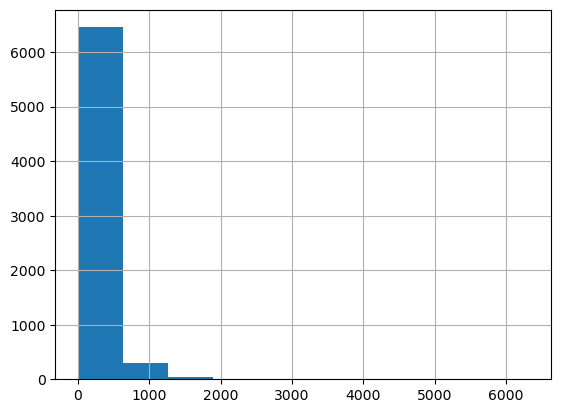

In [23]:
train['cc_length'] = [len(i.split()) for i in train.consumer_complaint]

<AxesSubplot:>

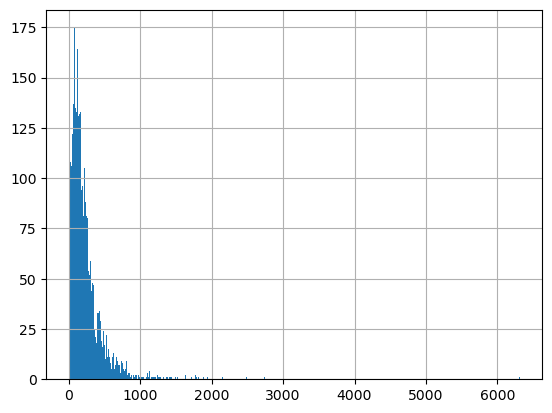

In [26]:

train.cc_length.hist(bins=1000)

- We can say most of our complaints our of length 800-900 words. 
- After tokenization this length will increase
- This can be a limitation because BERT-based models have a Max Sequence Length of 512. 
- In this tutorial we will cut the length to 512 while training and predicting. 